In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
# 한글폰트 사용을 위해 설치

import koreanize_matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font', family ='AppleGothic')

pd.set_option('display.max_columns', None) # 모든 열 출력

# 데이터 병합하기

In [2]:
# 환율 데이터 생성
#!pip install yfinance
import yfinance as yf
import pandas as pd

# 설정
start_date = "2021-04-01"
end_date = pd.Timestamp.now().strftime("%Y-%m-%d")

# 티커 설정 (USD/KRW)
ticker = "KRW=X"

# 데이터 다운로드
data = yf.download(ticker, start=start_date, end=end_date)

# 종가 데이터만 선택
df9 = data[['Close']]
df9.to_csv('환율.csv', index = Fasle)

'\n# 설정\nstart_date = "2021-04-01"\nend_date = pd.Timestamp.now().strftime("%Y-%m-%d")\n\n# 티커 설정 (USD/KRW)\nticker = "KRW=X"\n\n# 데이터 다운로드\ndata = yf.download(ticker, start=start_date, end=end_date)\n\n# 종가 데이터만 선택\ndf9 = data[[\'Close\']]\ndf9.to_csv(\'환율.csv\', index = Fasle)'

In [100]:
# 데이터 불러오기 
# 가격
df1 = pd.read_excel('코발트가격_(202106~202406).xls',header = 9,usecols = ['기준일','기준가격','등락가','등락비율','재고량'])
# 광물종합지수
df2 = pd.read_excel('광물종합지수(202106~202406).xls', header =3, sheet_name = 0)
df3 = pd.read_excel('광물종합지수(202106~202406).xls', header =3, sheet_name = 1)
df4 = pd.read_excel('광물종합지수(202106~202406).xls', header =3, sheet_name = 2)
# 시장전망지수
df5 = pd.read_excel('시장전망지표2024-06-14.xls', header =2)
# 수급안정화지수
df6 = pd.read_excel('수급안정화지수2024-06-14.xls', header =2)
# 에너지광물지수
df7 = pd.read_csv('053.한국광해광업공단_파생지수_에너지광물지수_20240520.csv', encoding = 'cp949')
# 코발트 수출입
df8 = pd.read_csv('코발트_수출입.csv')
df9 = pd.read_csv('환율.csv')

# 데이터병합

In [101]:
dfs = [df2, df3, df4, df5, df6]
for df in dfs:
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [102]:
def change_date(df) :
    # '기준일' 열을 datetime 형식으로 변환
    df['기준일'] = pd.to_datetime(df['기준일'], format='%Y%m%d')

    # '기준일' 열을 'YYYY-MM-DD' 형식의 문자열로 변환
    df['기준일'] = df['기준일'].dt.strftime('%Y-%m-%d')
change_date(df2)
change_date(df3)
change_date(df4)

In [103]:
dfs = [df1, df2, df3, df4, df7]
for df in dfs:
    # '기준일' 열을 날짜(datetime) 형식으로 변환
    df['기준일'] = pd.to_datetime(df['기준일'])

    # '기준일'을 인덱스로 설정
    df.set_index('기준일', inplace=True)

In [104]:
# 재고량 값 전부 0 삭제
df1.drop(['재고량'], axis =1, inplace =True)

In [105]:
df2['광물종합지수'] = df2['광물종합지수'].str.replace(',', '').astype(float)

In [106]:
df3['메이저금속지수'] = df3['메이저금속지수'].str.replace(',', '').astype(float)

In [107]:
df4['희유금속지수'] = df4['희유금속지수'].str.replace(',', '').astype(float)

In [108]:
df7 = df7[-769:].copy()

In [109]:
df9 = df9[49:].copy()

In [110]:
df9.rename(columns = {'Date':'기준일'}, inplace= True)
df9['기준일'] = pd.to_datetime(df9['기준일'])
df9.set_index('기준일', inplace=True)

In [111]:
# 데이터프레임 리스트
dfs = [df1, df2, df3, df4, df7, df9]

# 여러 데이터프레임 병합 (기준일 기준 outer join)
df_merged1 = reduce(lambda left, right: pd.merge(left, right, on='기준일', how='outer'), dfs)

In [114]:
df1 = df_merged1[['기준가격','광물종합지수','메이저금속지수','희유금속지수','에너지광물지수','Close']].copy()

In [115]:
df1.reset_index(inplace = True)

In [116]:
# df1의 날짜를 연-월로 변환
df1['Month'] = df1['기준일'].dt.to_period('M').dt.to_timestamp()
df1

,기준일,기준가격,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,Month
0,2021-06-09,42500.0,2407.51,2494.11,1682.47,2193.115993,1116.890015,2021-06-01
1,2021-06-10,42500.0,2436.46,2523.49,1682.47,2227.469874,1116.410034,2021-06-01
2,2021-06-11,42500.0,2452.92,2519.40,1682.47,2284.482995,1111.260010,2021-06-01
3,2021-06-14,42500.0,2498.37,2567.59,1741.94,2315.536776,1115.550049,2021-06-01
4,2021-06-15,42500.0,2496.55,2564.67,1741.94,2315.536776,1116.319946,2021-06-01
...,...,...,...,...,...,...,...,...
782,2024-06-07,NaN,2835.86,2513.88,1815.23,NaN,1365.250000,2024-06-01
783,2024-06-10,NaN,NaN,NaN,NaN,NaN,1379.050049,2024-06-01
784,2024-06-11,NaN,NaN,NaN,NaN,NaN,1373.959961,2024-06-01
785,2024-06-12,NaN,NaN,NaN,NaN,NaN,1377.359985,2024-06-01


In [117]:
df5['기준일'] = pd.to_datetime(df5['기준일'], format='%Y-%m-%d')
# '기준일'을 인덱스로 설정
df5.set_index('기준일', inplace=True)

In [118]:
df5 = df5[-36:].copy()

In [119]:
df6['기준일'] = pd.to_datetime(df6['기준일'], format='%Y%m')
# '기준일'을 인덱스로 설정
df6.set_index('기준일', inplace=True)

In [120]:
df6 = df6[-37:].copy()

In [121]:
df8.drop(['HS코드','품목명'], axis =1, inplace=True)
df8.rename(columns={'기간': '기준일'}, inplace =True)

In [122]:
df8 = df8[1:].copy()
df8['기준일'] = pd.to_datetime(df8['기준일'], format='%Y-%m')

# '기준일'을 인덱스로 설정
df8.set_index('기준일', inplace=True)

In [123]:
# 데이터프레임 리스트
dfs = [df5, df6, df8]

# 여러 데이터프레임 병합 (기준일 기준 outer join)
df_merged = reduce(lambda left, right: pd.merge(left, right, on='기준일', how='outer'), dfs)
df_merged = df_merged.sort_values(by='기준일')

In [124]:
df2 =df_merged[['시장전망지표','수급안정화지수','수출 중량','수출 금액','수입 중량','수입 금액','무역수지']].copy()

### 수급안정화지수 vs 시장전망지표

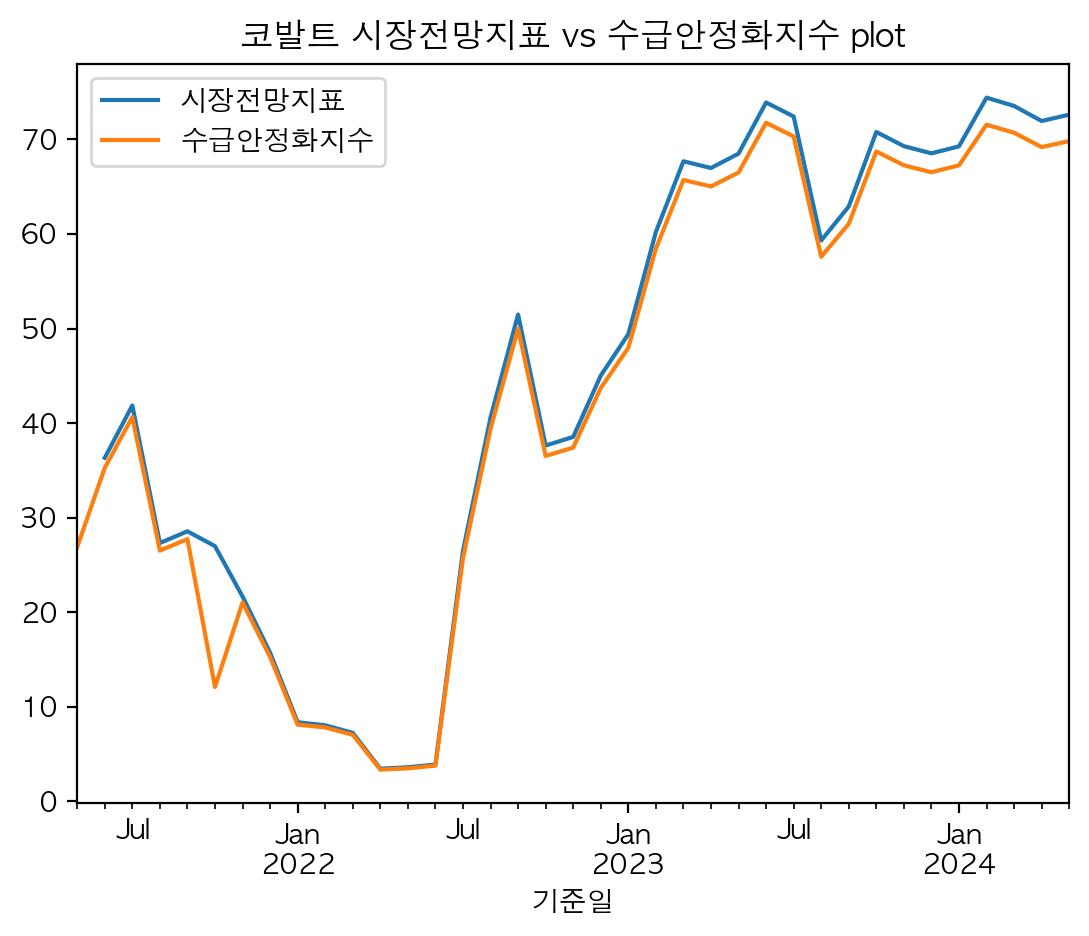

In [125]:
df2[['시장전망지표','수급안정화지수']].plot()
plt.title('코발트 시장전망지표 vs 수급안정화지수 plot')
plt.show()

- 시장전망지표와 수급안정화지수의 상관관계는 1
- 그래프 확인 결과 흐름도 똑같은 것을 알 수 있음. 따라서 두 변수 중 하나만 써도 충분하다 판단.
- 코발트의 수급현황은 현재 점점 좋아지고 있음.

In [126]:
df2.reset_index(inplace = True)

In [127]:
df2.rename(columns={'기준일': 'Month'}, inplace =True)

In [128]:
merged_df = pd.merge(df1, df2, how='outer', on='Month', suffixes=('_daily', '_monthly'))

In [129]:
merged_df.sort_values(by='기준일', inplace = True)
merged_df.drop(['Month'], axis =1, inplace = True)
data = merged_df.copy()
data

,기준일,기준가격,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,시장전망지표,수급안정화지수,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2021-06-09,42500.0,2407.51,2494.11,1682.47,2193.115993,1116.890015,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
1,2021-06-10,42500.0,2436.46,2523.49,1682.47,2227.469874,1116.410034,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
2,2021-06-11,42500.0,2452.92,2519.40,1682.47,2284.482995,1111.260010,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
3,2021-06-14,42500.0,2498.37,2567.59,1741.94,2315.536776,1115.550049,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
4,2021-06-15,42500.0,2496.55,2564.67,1741.94,2315.536776,1116.319946,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,2024-06-10,NaN,NaN,NaN,NaN,NaN,1379.050049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,2024-06-11,NaN,NaN,NaN,NaN,NaN,1373.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,2024-06-12,NaN,NaN,NaN,NaN,NaN,1377.359985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,2024-06-13,NaN,NaN,NaN,NaN,NaN,1376.020020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
data.isnull().sum()

기준일         1
기준가격       32
광물종합지수      5
메이저금속지수     5
희유금속지수      5
에너지광물지수    19
Close       1
시장전망지표     10
수급안정화지수     9
수출 중량      32
수출 금액      32
수입 중량      32
수입 금액      32
무역수지       32
dtype: int64

In [131]:
data = data.dropna()

In [132]:
#data = data[0:787].copy()
data.to_csv("코발트data_결측치제거완.csv", index = False)

# EDA

In [140]:
df = pd.read_csv('코발트data_결측치제거완.csv')

In [141]:
df['기준일'] = pd.to_datetime(df['기준일'])
df.set_index('기준일', inplace=True)

In [142]:
df

,기준가격,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,시장전망지표,수급안정화지수,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
기준일,,,,,,,,,,,,,
2021-06-09,42500.0,2407.51,2494.11,1682.47,2193.115993,1116.890015,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
2021-06-10,42500.0,2436.46,2523.49,1682.47,2227.469874,1116.410034,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
2021-06-11,42500.0,2452.92,2519.40,1682.47,2284.482995,1111.260010,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
2021-06-14,42500.0,2498.37,2567.59,1741.94,2315.536776,1115.550049,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
2021-06-15,42500.0,2496.55,2564.67,1741.94,2315.536776,1116.319946,36.33,35.27,20.0,673.0,1060.9,12549.0,-11876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,27720.0,2886.01,2500.92,1819.96,3043.299367,1370.479980,71.94,69.18,1.1,63.0,1142.6,7910.0,-7847.0
2024-04-25,27730.0,2895.92,2521.51,1819.96,3021.949758,1376.969971,71.94,69.18,1.1,63.0,1142.6,7910.0,-7847.0
2024-04-26,27730.0,2917.29,2545.06,1819.96,3037.851922,1371.699951,71.94,69.18,1.1,63.0,1142.6,7910.0,-7847.0


### 전체데이터 상관관계 확인

<AxesSubplot:>

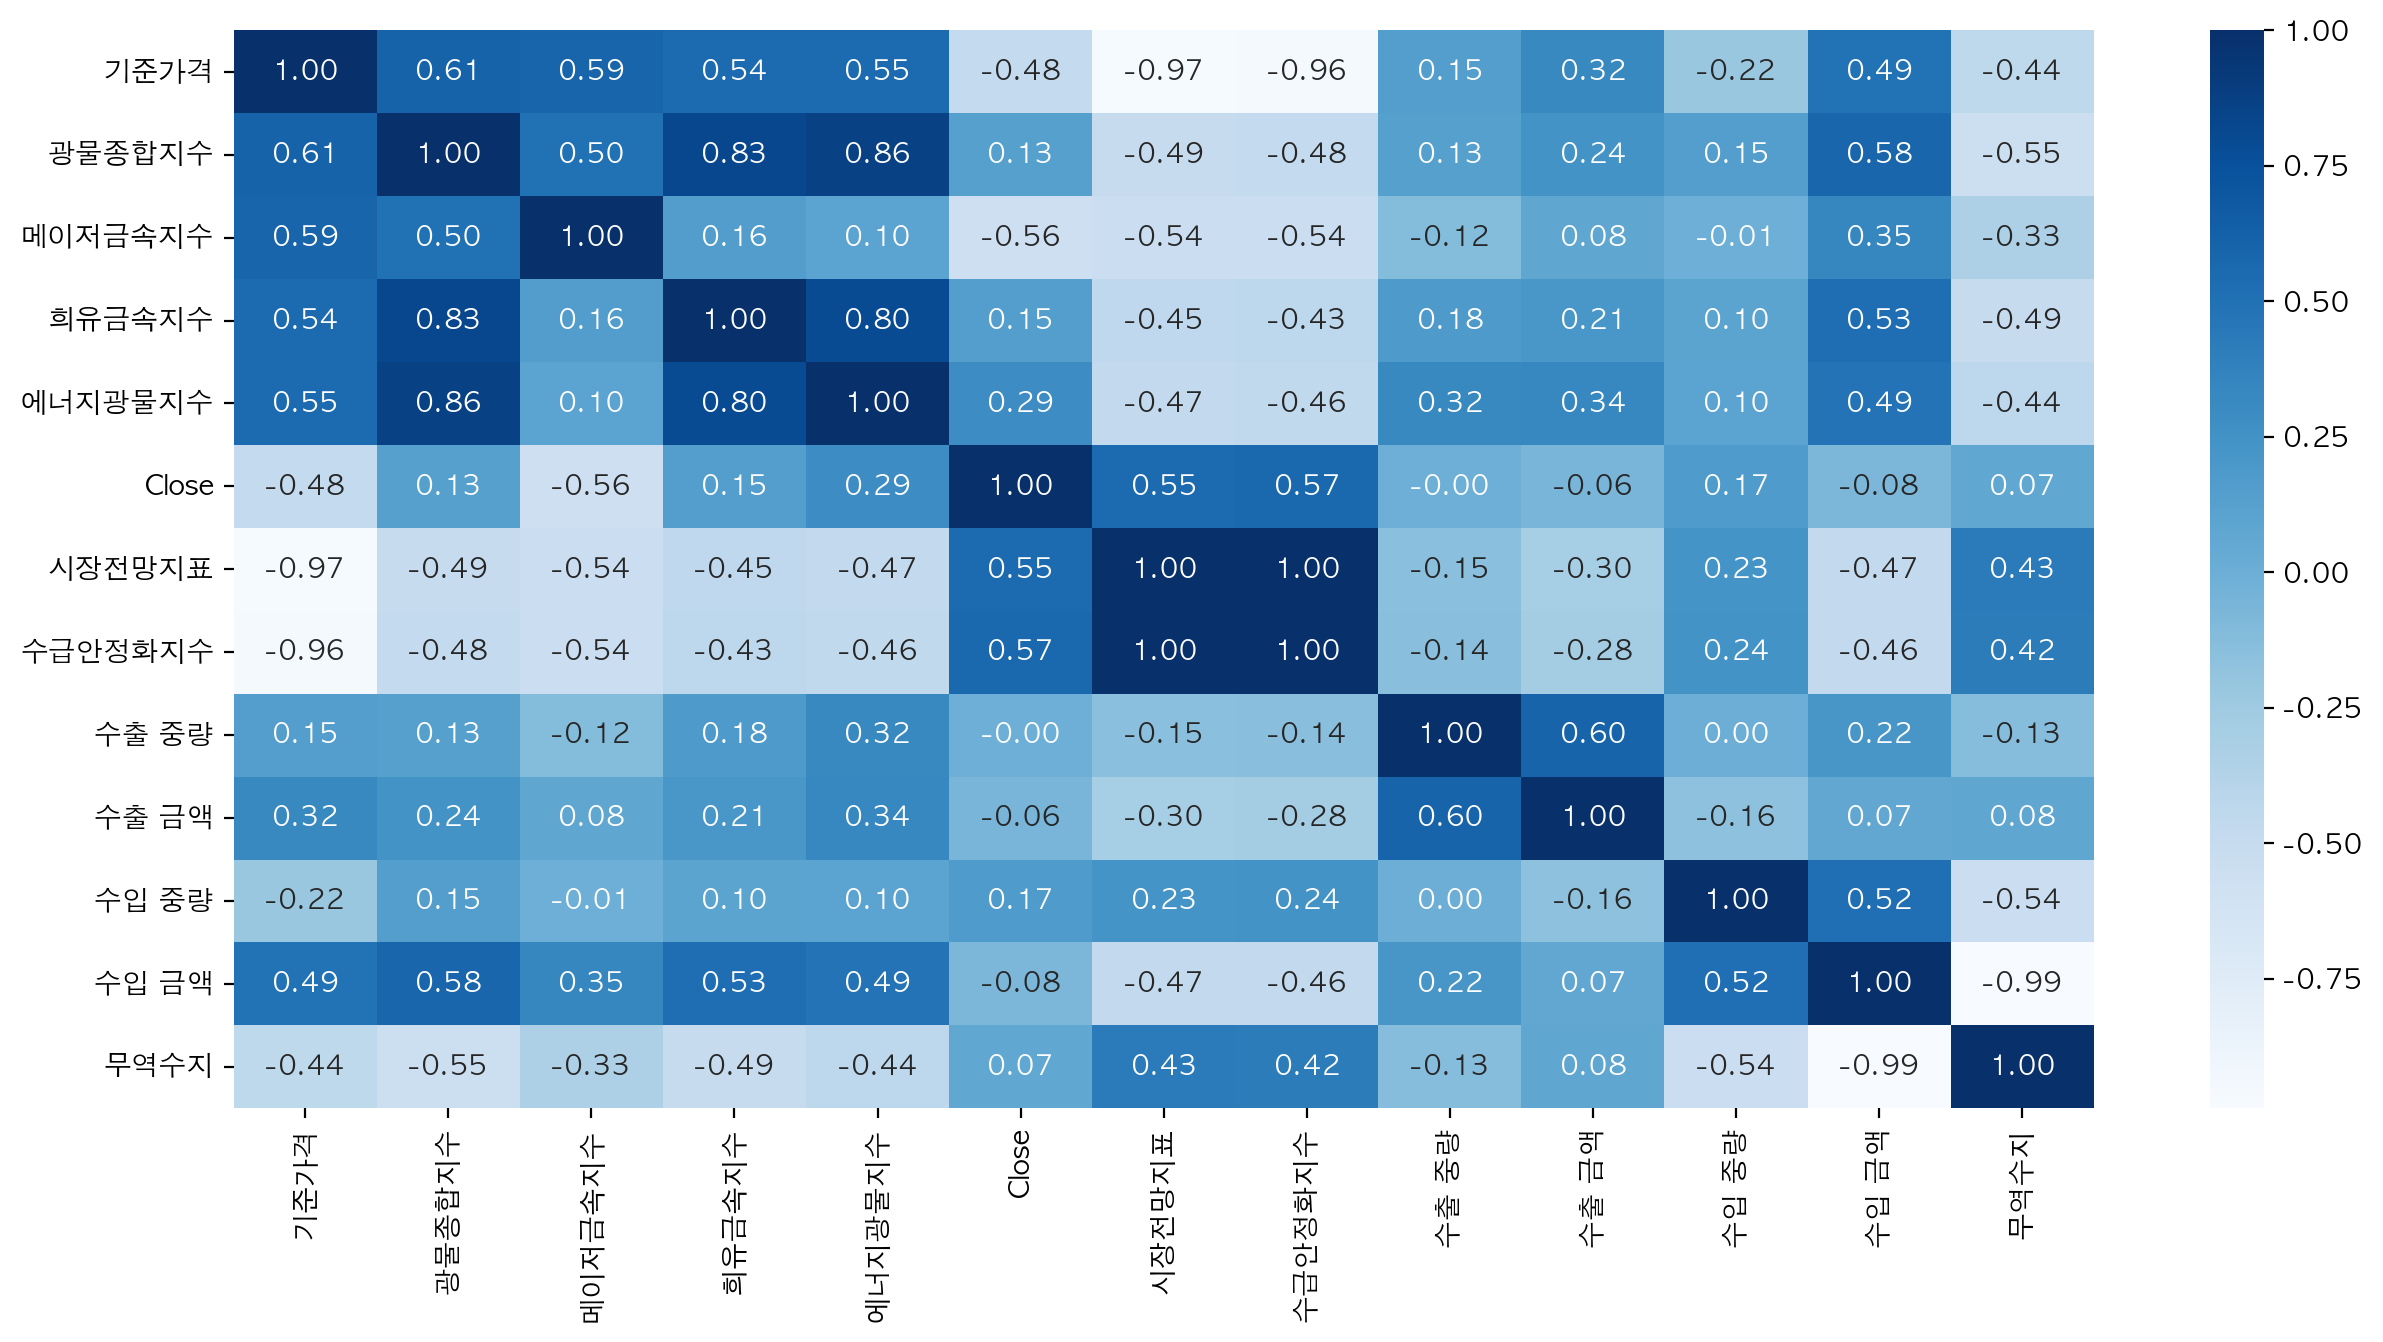

In [143]:
# 히트맵
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f")

- 코발트 가격과 희유금속지수 사이 상관관계 0.54인 것을 확인
- 환율과도 -0.48라는 꽤 높은 상관관계를 보인다. 따로 확인할 필요가 있어보임

### 코발트 기준가격 plot

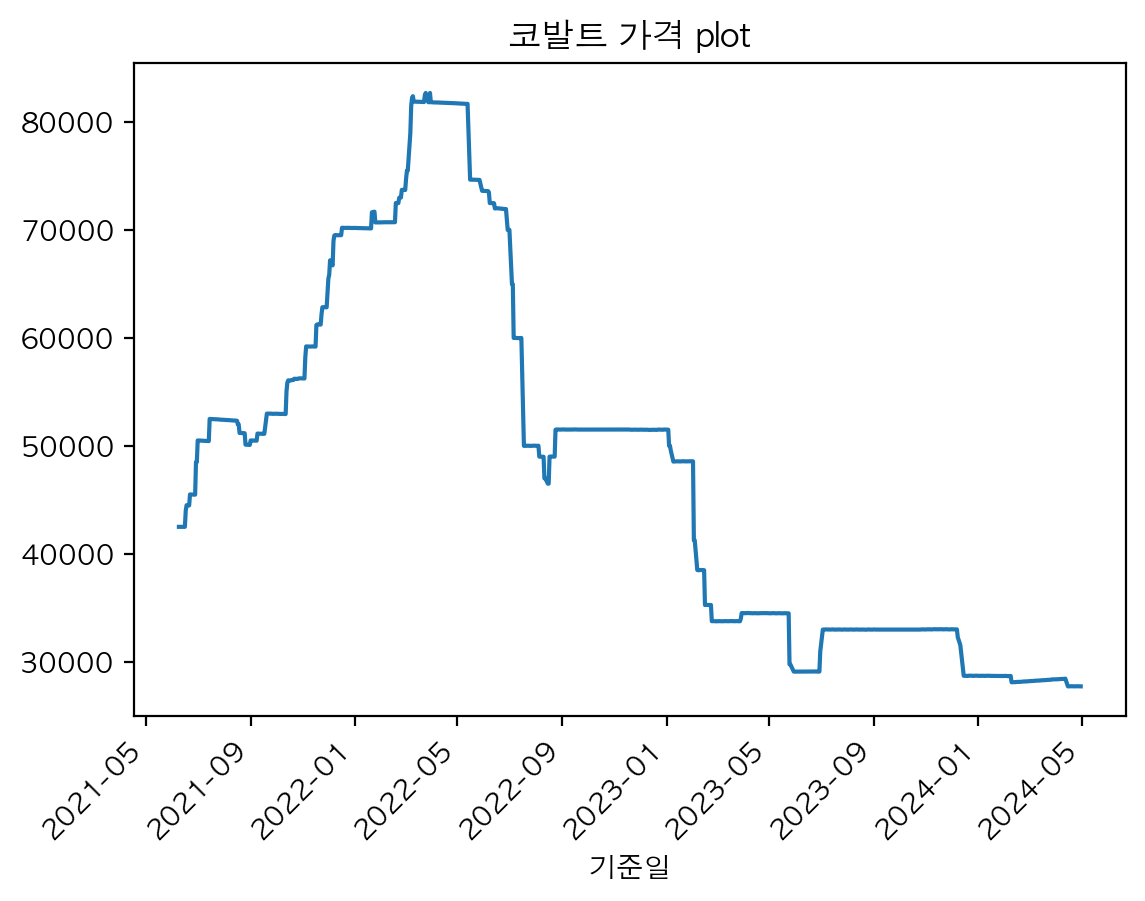

In [144]:
df['기준가격'].plot()
plt.title('코발트 가격 plot')
plt.xticks(rotation=45, ha='right')
plt.show()

In [145]:
# 기준가격이 최고점을 찍었을 때 일자 2022-03-25
df['기준가격'].idxmax()

Timestamp('2022-03-25 00:00:00')

- 코발트는 가격이 떨어지는 추세
- 가격을 유지하다가 훅 떨어지는 것이 반복
- 2021년 전부터 가격이 오르다가 2022.03.25에 피크를 찍고 훅 떨어짐. -> 전기차 수요확대 &러시아의 우크라이나 침공 사태 여파
- +전기차 수요 데이터가 있었으면 좋겠다

### 코발트 가격과 환율 사이의 관계

Text(0.5, 0, '기준일')

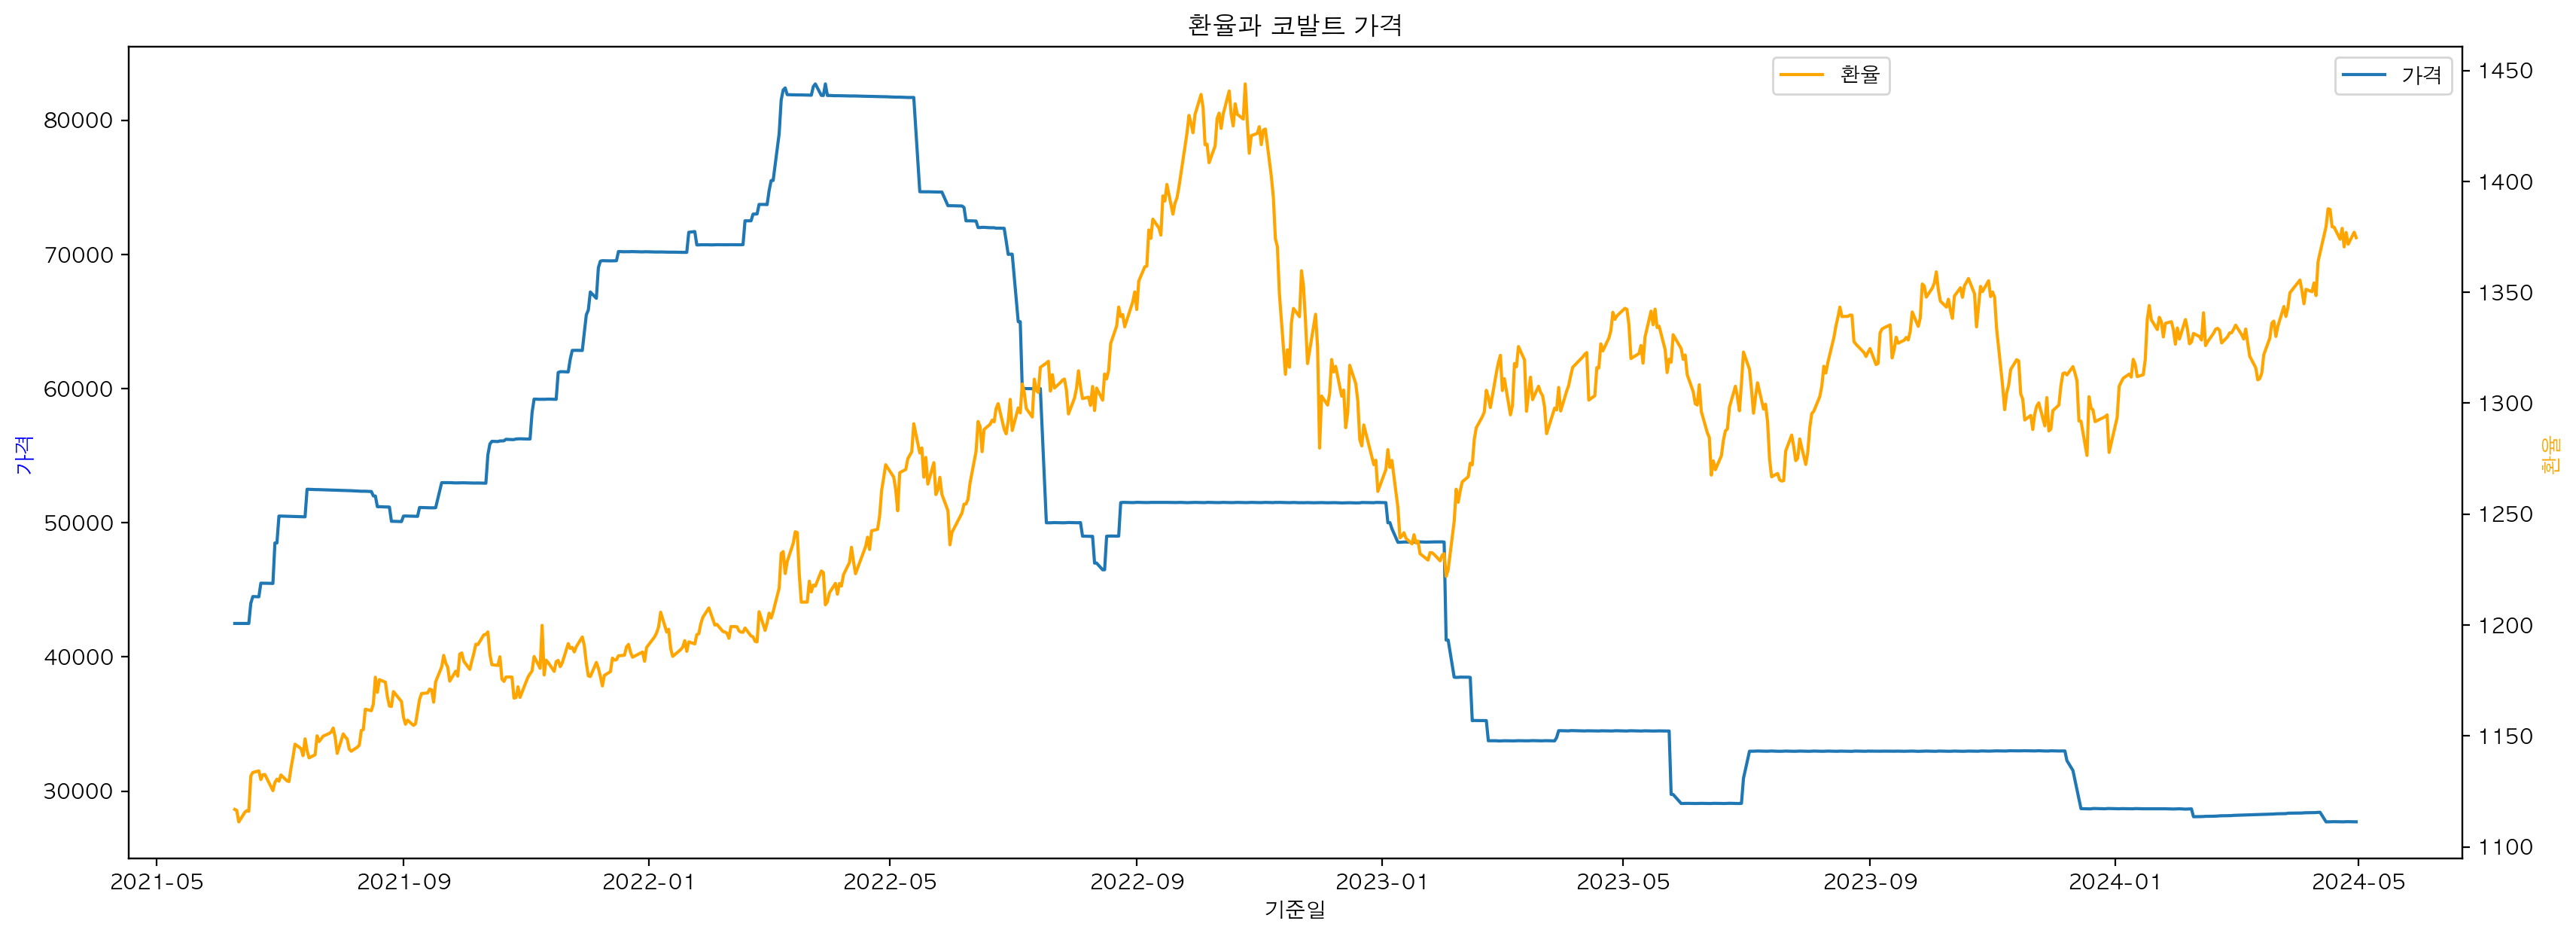

In [146]:
plt.figure(figsize=(20, 7))
# 기준가격에 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 환율에 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='Close', data=df, color='orange', label='환율', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('환율', color='orange')
# 타이틀과 범례 설정
plt.title('환율과 코발트 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()

- 확실히 환율에 영향을 받는다기 보다는 그냥 다른 이유로 인해 코발트 혼자 떨어진게 얻어걸려서 상관관계가 그렇게 나온듯한 모습.

### 시장전망지표 vs 수급안정화지수

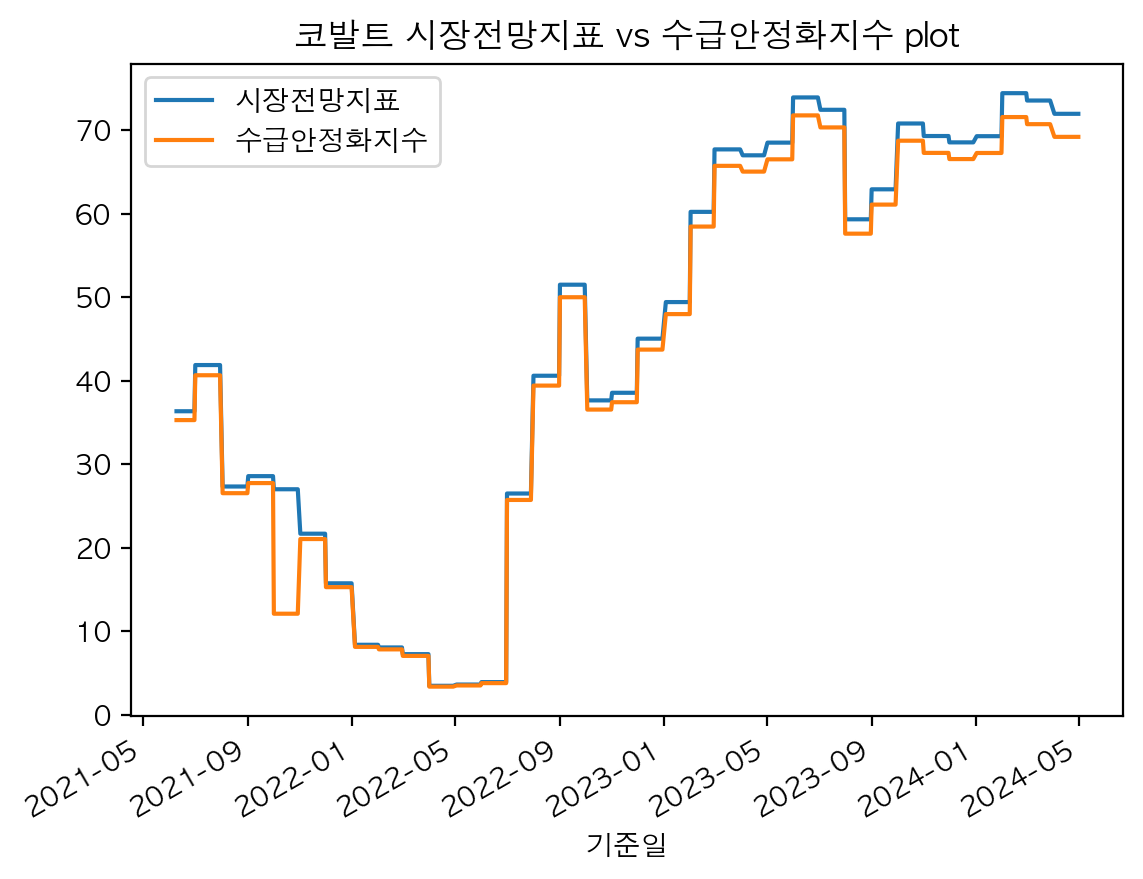

In [147]:
df[['시장전망지표','수급안정화지수']].plot()
plt.title('코발트 시장전망지표 vs 수급안정화지수 plot')
plt.show()

- 시장전망지표와 수급안정화지수의 상관관계는 1
- 그래프 확인 결과 흐름도 똑같은 것을 알 수 있음. 따라서 두 변수 중 하나만 써도 충분하다 판단.
- 코발트의 수급현황은 현재 점점 좋아지고 있음.

### 희유금속지수와 코발트 가격 관계

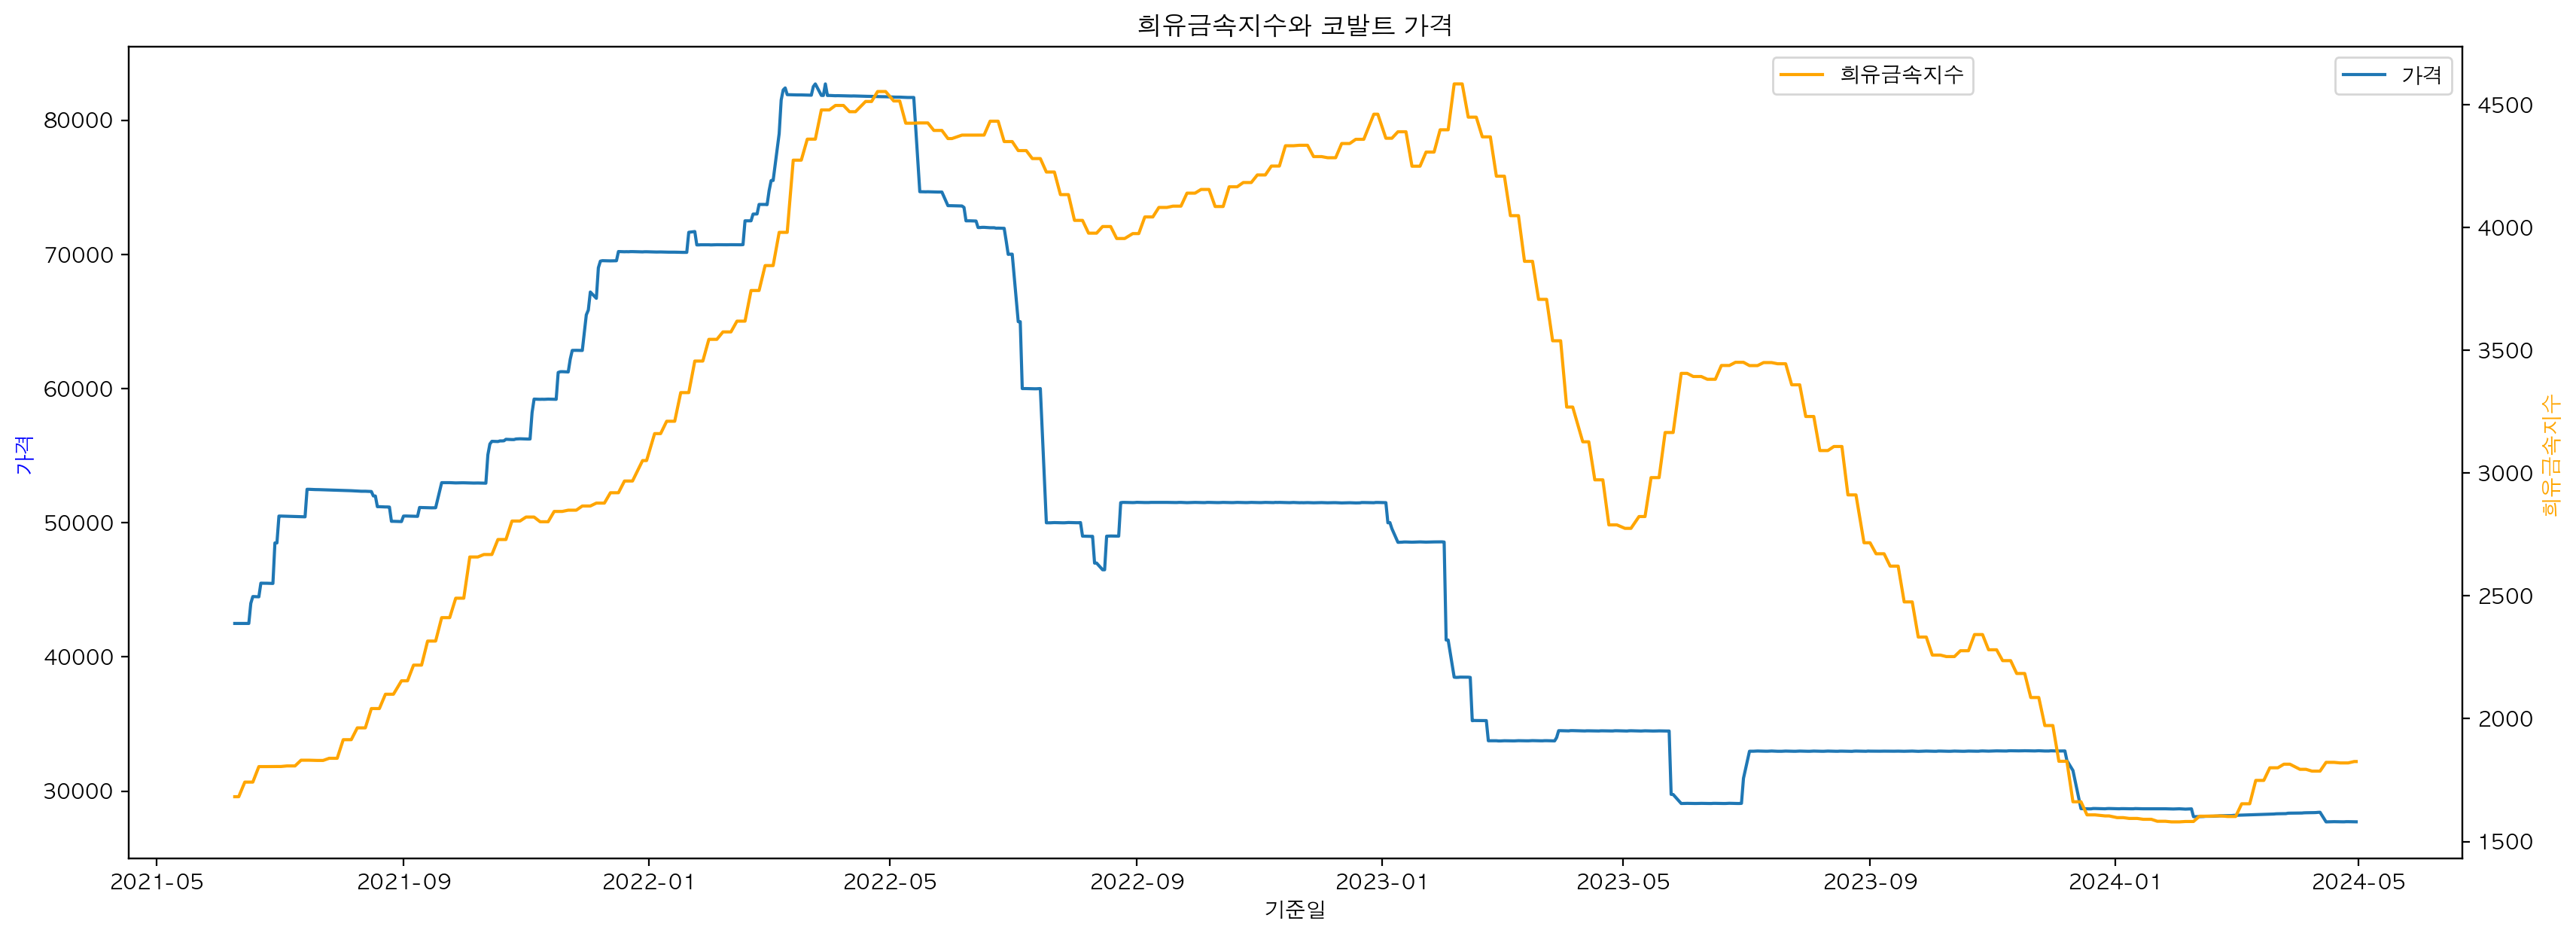

In [148]:
plt.figure(figsize=(20, 7))
# 가격 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 희유금속지수 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='희유금속지수', data=df, color='orange', label='희유금속지수', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('희유금속지수', color='orange')
# 타이틀과 범례 설정
plt.title('희유금속지수와 코발트 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()

- 코발트 기준가격과 희유금속지수 사이 상관관계를 확인한 결과 0.54 
- 두 변수 모두 점점 떨어지는 추세를 보이는 것을 보아 코발트의 가격 하락이 희유금속지수에 영향을 준 것으로 보인다.